In [40]:
import pandas as pd
import seaborn as sns
import ssl
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [41]:
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)

In [42]:
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [43]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam'] #LIN28A에 특이적으로 결합한 양 / 전체 RNA 양 = LIN28A 결합 비율
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam']) #LIN28A knockdown이 번역 효율에 미치는 영향
cnts.head(20)

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.00000,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000104017.2,chr1,3445779,3448011,-,2233,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000103025.2,chr1,3535200,3537508,-,2309,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000089699.2,chr1;chr1,3536810;3583628,3536910;3583776,+;+,250,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000103201.2,chr1,3582674,3584730,-,2057,6,0,0,0,2,3,inf,NaN


/home/jieunlisa/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


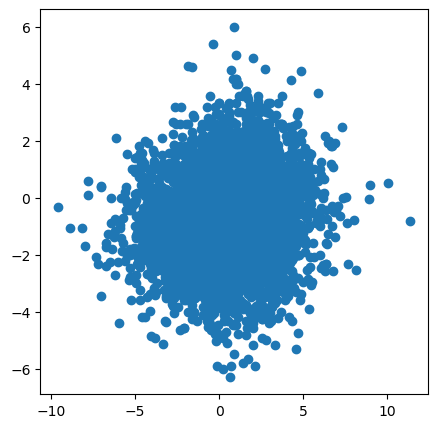

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

In [45]:
# log2 변환 + inf 제거 한꺼번에
x_raw = np.log2(cnts['clip_enrichment'])
y_raw = np.log2(cnts['rden_change'])

# inf / NaN 모두 제거
valid_mask = (~np.isinf(x_raw)) & (~np.isinf(y_raw)) & (~np.isnan(x_raw)) & (~np.isnan(y_raw))

x = x_raw[valid_mask]
y = y_raw[valid_mask]
#print("x contains inf:", np.isinf(x).any())
#print("y contains inf:", np.isinf(y).any())    

from scipy.stats import pearsonr
import scipy.stats as stats
stats.pearsonr(x,y)

PearsonRResult(statistic=0.20593282890450113, pvalue=1.1302704779459566e-154)

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_497/245609265.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('LIN28A CLIP enrichment ($\log_2$)')
/tmp/ipykernel_497/245609265.py:7: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Ribosom density change upon Lin28a knockdown ($\log_2$)')


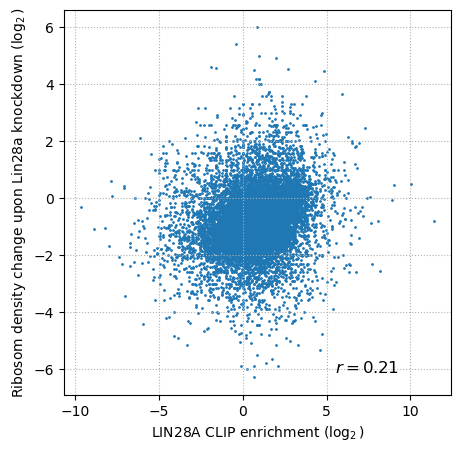

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']),s=1)


ax.set_xlabel('LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosom density change upon Lin28a knockdown ($\log_2$)')
ax.grid(True, linestyle=":")

x_raw = np.log2(cnts['clip_enrichment'])
y_raw = np.log2(cnts['rden_change'])
valid_mask = (~np.isinf(x_raw)) & (~np.isinf(y_raw)) & (~np.isnan(x_raw)) & (~np.isnan(y_raw))

x = x_raw[valid_mask]
y = y_raw[valid_mask]
r_value, p_value = pearsonr(x,y)
ax.text(0.7, 0.05, f'$r = {r_value:.2f}$', transform=ax.transAxes,
        fontsize=12, verticalalignment='bottom')
plt.show()

In [47]:
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [48]:
cnts1=cnts.reset_index()
cnts1.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


In [49]:
cnts1['Geneid clean'] = cnts1['Geneid'].str.split('.').str[0]
cnts1.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Geneid clean
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000102693
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000064842
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN,ENSMUSG00000051951
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN,ENSMUSG00000102851
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000103377


In [50]:
cnts1 = pd.merge(cnts1, mouselocal[['gene_id', 'type']], 
                left_on='Geneid clean', right_on='gene_id', 
                how='left')
cnts1.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Geneid clean,gene_id,type
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000102693,NaN,NaN
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000064842,NaN,NaN
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN,ENSMUSG00000051951,ENSMUSG00000051951,integral membrane
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN,ENSMUSG00000102851,NaN,NaN
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000103377,NaN,NaN


['integral membrane' 'nucleus' 'cytoplasm']


<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_497/581611276.py:17: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('LIN28A CLIP enrichment ($\log_2$)')
/tmp/ipykernel_497/581611276.py:18: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Ribosom density change upon Lin28a knockdown ($\log_2$)')


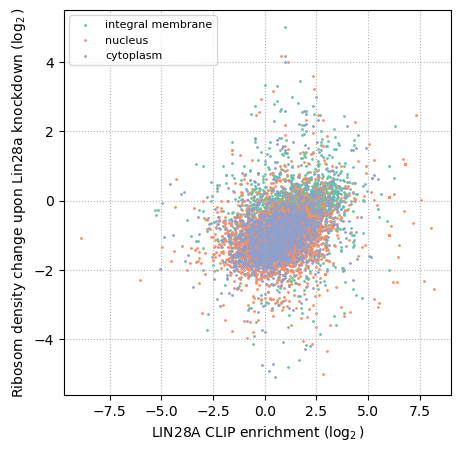

In [58]:
localizations = cnts1['type'].dropna().unique()
print(localizations)
palette = sns.color_palette('Set2', len(localizations))
color_dict = dict(zip(localizations, palette))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for loc in localizations:
    subset = cnts1[cnts1['type'] == loc]
    ax.scatter(
        np.log2(subset['clip_enrichment']),
        np.log2(subset['rden_change']),
        label=loc,
        color=color_dict[loc],
        s=1,
    )
ax.set_xlabel('LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosom density change upon Lin28a knockdown ($\log_2$)')
ax.grid(True, linestyle=":")


ax.legend(loc="upper left", fontsize=8)

plt.show()